## Features_smoothing

## Features

- Savitzky-golay filter

__Load data__

__Data Source:__ lob_sample_data.parquet

In [1]:
import pandas as pd

df = pd.read_parquet('lob_sample_data.parquet', engine='pyarrow')

In [2]:
df.head()

,Timestamp,Exchange,Bid,Ask,Date,Mid_Price
0,0.000,Exch0,[],[],2025-01-02,NaN
1,0.279,Exch0,"[[1, 6]]",[],2025-01-02,NaN
2,1.333,Exch0,"[[1, 6]]","[[800, 1]]",2025-01-02,400.5
3,1.581,Exch0,"[[1, 6]]","[[799, 1]]",2025-01-02,400.0
4,1.643,Exch0,"[[1, 6]]","[[798, 1]]",2025-01-02,399.5


In [3]:
import ast

#convert string to lists
df['Bid'] = df['Bid'].apply(ast.literal_eval)
df['Ask'] = df['Ask'].apply(ast.literal_eval)

In [4]:
#drop missing rows in mid price
df = df.dropna(subset=['Mid_Price'])

__Savitzky-golay filter__

The Savitzky-golay filter is used to smooth data points and increase data precision without distorting the signal tendency. It preserves important signal features such as relative maxima, minima, and width, which are can be flattened by other types of smoothing filters.

The filter coefficients are obtained by performing a least-squares fit of a polynomial of a certain degree to a sliding window of data points.

$$
\hat{y}_i = \sum_{j=-\frac{M}{2}}^{\frac{M}{2}} c_j \cdot y_{i+j}
$$

where-
- $\hat{y}_i$ is the smoothed value at point $i$
- $c_j$ are the filter coefficients for the polynomial
- $y_{i+j}$ are the data points within the window
- $M$ is the window length (odd number)

In [11]:
from scipy.signal import savgol_filter

#window_length should be odd and poly order must be less than window_length.
window_length = 5  
poly_order = 2  #2 or 3/ low order poly is a good choice for noisy data

#apply
df['Smoothed_Mid_Price'] = savgol_filter(df['Mid_Price'], window_length, poly_order)

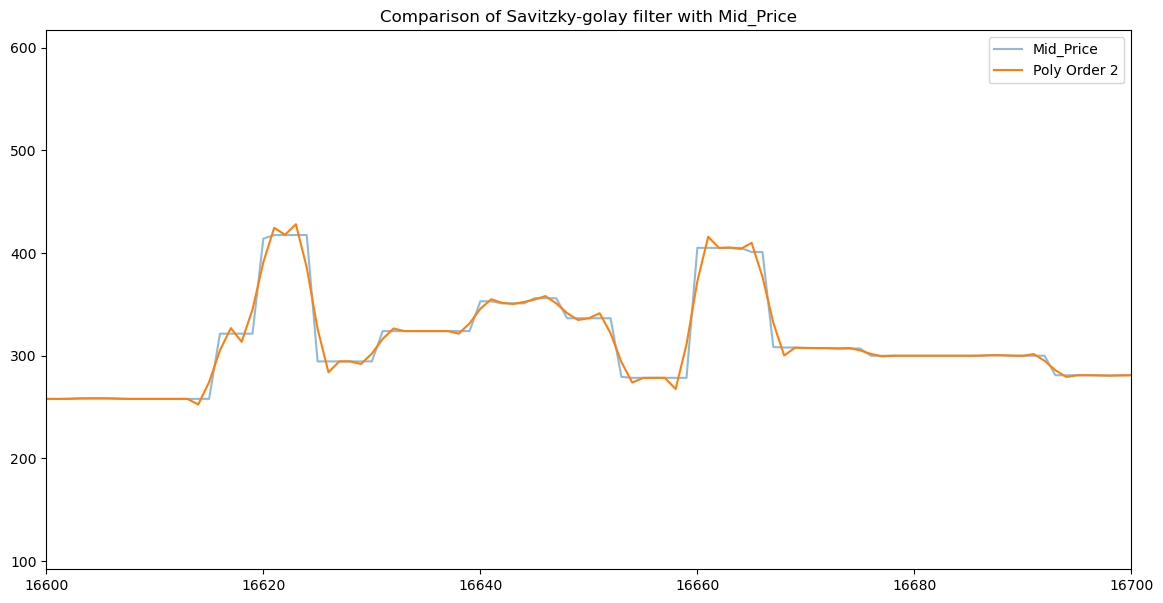

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Mid_Price'], label='Mid_Price', alpha=0.5)
plt.plot(df['Smoothed_Mid_Price'], label='Poly Order 2')

start_index = 16600  
end_index = 16700  
plt.xlim(start_index, end_index)

plt.legend()
plt.title('Comparison of Savitzky-golay filter with Mid_Price')
plt.show()